In [1]:
from urllib.request import urlopen
import io
import requests
import pandas as pd
import webbrowser
from PyPDF2 import PdfReader, PdfWriter

In [2]:
from wdtools import *

In [3]:
pdf_path = r'L:\NaturalResources\Wetlands\Local Wetland Inventory\WAPO\EPA_2022_Tasks\Task 1 WD Mapping'

In [4]:
pdf_outpath = fr'{pdf_path}\output\pdf'

In [5]:
revpath = r'L:\NaturalResources\Wetlands\Local Wetland Inventory\WAPO\EPA_2022_Tasks\Task 1 WD Mapping\output\to_review'

In [182]:
#setID = 'Set001'; nm_to_add=0
#setID = 'Set002'; nm_to_add=1420
#setID = 'Set003'; nm_to_add = 2143
setID = 'Set004'; nm_to_add = 2878
#setID = 'Set005'; nm_to_add = 3932
wd = combine_wd_tables(setID=setID, nm_to_add=nm_to_add)

In [101]:
wd = get_all_wd(num=4)

In [107]:
sa_gdf_all = get_all_SA(num=4)

In [170]:
sa_gdf_all[sa_gdf_all.wdID=='WD2021-0495']

,code,wdID,geometry,SetID
2412,2,WD2021-0495,"POLYGON ((1184166.533 926606.419, 1184863.180 ...",4


<AxesSubplot:>

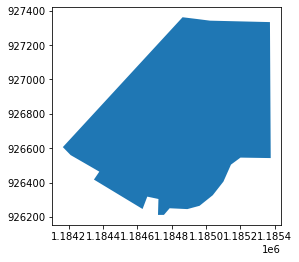

In [109]:
sa_gdf_all[sa_gdf_all.wdID=='WD2021-0495'].plot()

In [183]:
wdID = 'WD2020-0252'

In [181]:
url = wd.loc[wd.wetdet_delin_number == wdID, 'DecisionLink'].values[0]
extract_page_from_docLink(url=url, pageNm=7, wdID=wdID)

In [184]:
wd.loc[wd.wetdet_delin_number == wdID, ['longitude', 'latitude']]

,longitude,latitude
970,-123.014544,45.282375


In [185]:
lon=wd[wd.wetdet_delin_number == wdID].longitude.values[0]
lat=wd[wd.wetdet_delin_number == wdID].latitude.values[0]
get_point_from_lonlat(lon=lon, lat=lat)

,Longitude,Latitude,geometry
0,-123.014544,45.282375,POINT (665216.744 1297502.078)


In [181]:
lon=wd.loc[wd.wetdet_delin_number == wdID, 'longitude'].values[0]
lat=wd.loc[wd.wetdet_delin_number == wdID, 'latitude'].values[0]
get_point_from_lonlat(lon=lon, lat=lat)

,Longitude,Latitude,geometry
0,-122.862067,45.619127,POINT (707978.149 1419074.903)


In [33]:
unmapped_notes = pd.read_excel(f'{inpath}\\notes\\LCOGUnmappedRecordsJB.xlsx', skiprows=1)

In [179]:
unmapped_notes[unmapped_notes.wetdet_delin_number == wdID][['wetdet_delin_number', 'issue', 'JB Notes']].values

array([['WD2017-0050',
        'georeferencing will take some time; pages from 7 to 21',
        'There are six study areas']], dtype=object)

In [79]:
t = '07S11W01BB'
ct_nm = 'Lincoln'

In [80]:
t in trsqq

True

In [46]:
create_ORMapNm(ct_nm=ct_nm, trsqq=t)

'0212.00S05.00W02CB--0000'

In [81]:
create_ORTaxlot(cnt_code=cnt_dict[ct_nm], trsqq=t, lot='9300')

'2107.00S11.00W01BB--000009300'

In [82]:
'2107.00S11.00W01BB--000009300' in all_txid

True

In [146]:
url = wd.loc[wd.wetdet_delin_number == wdID, 'DecisionLink'].values[0]
webbrowser.open(url)

True

In [93]:
wdID = 'WD2020-0217'
url = wd.loc[wd.wetdet_delin_number == wdID, 'DecisionLink'].values[0]
#print(url)
o = 0
for i in range(5, 11):
    if o==0:
        extract_page_from_docLink(url=url, pageNm=i, wdID=wdID)
    elif o==1:
        extract_page_from_locPath(filePath=pdf_path+f'\\docs\\{wdID}_10_14.pdf', 
                              pageNm=i, wdID=wdID)
    else:
        extract_page_from_locPath(filePath='C:/Users/clid1852/Downloads/WD20170490R ReissuedAgencyDecision.pdf', 
                                  pageNm=i, wdID=wdID)
    print(i)

5
6
7
8
9
10


In [95]:
url

'https://docs.dsl.state.or.us/PublicReview/ElectronicFile.aspx?docid=3643703&dbid=0'

In [140]:
wdID = 'WD2019-0320'
extract_page_from_locPath(filePath=f'C:/Users/clid1852/Downloads/WD20190320 AgencyDecision (2).pdf', 
                          pageNm=6, wdID=wdID)

In [166]:
wdID = 'WD2021-0643'
extract_page_from_locPath(filePath=f'C:/Users/clid1852/Downloads/WD2019-0074Final.pdf', 
                          pageNm=7, wdID=wdID)

In [22]:
wdID = 'WD2017-0050'
extract_page_from_locPath(filePath=pdf_outpath+'\\WD2017-0050_7_21.pdf', 
                          pageNm=0, wdID=wdID)

In [57]:
wdID = 'WD2017-0381'
pages = '7_8'
for i in range(1, 3):
    filePath = pdf_outpath + f'\\{wdID}_{pages}.pdf'
    extract_page_from_locPath(filePath, i, wdID, k=7) 

In [199]:
# A - lon=-122.780067, lat=45.300856
# F - lon=-122.829843, lat=45.496684
# WTP - lon=-122.808718, lat=45.363563
# C - lon=-122.878706, lat=45.431823
# E - lon=-122.901504, lat=45.525420
# B - lon=-122.893679, lat=45.467799
pnt = get_point_from_lonlat(lon=-122.893679, lat=45.467799, transprj=True, export=True)